# Graded Challange 2

Hi, my name Fauzan Nurachman a.k.a Ojan from class Full Time Data Science Batch 003

## Description

### Objective

Analyze Austin Smart City's project on waste disposal and management work and recommend to the government what the next action will be in the disposal and waste management system.

### Problem Statement

By knowing with data processed using mathematical systems such as statistics and calculus, we will be able to recommend to the government what system we add or do to the disposal and management of waste in the city.

# Working Area

Importing Library

For the first time, we have to import pandas, matplotlib, scipy, seaborn and numpy library for processing, manipulating and visual the data that we are going to do.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import numpy as np

Data Loading

After we imported the library, we're looking for the data we need in the Big Query Google Cloud Platform. Then we look for the dataset from the database available in bigquery-public-data.austin_waste.waste_and_diversion. After that we take the dataset we need with a query like this:

SELECT report_date, load_type, load_time, load_weight, dropoff_site 
FROM bigquery-public-data.austin_waste.waste_and_diversion
WHERE report_date between '2021-01-01' and '2021-07-09'
ORDER BY report_date

From this data, we will take data report_date, load_time, load_type, load_weight, dropoff_site.

After that, we import the data into .csv file by downloading on Google Cloud Platform to this notebook. After that we assign the variable to the DataFrame or df to continue processing the data.

In [ ]:
df=pd.read_csv('/content/h8dsft_P0GC2_Fauzan_Nurachman.csv')
df

,report_date,load_type,load_time,load_weight,dropoff_site
0,2021-01-01,SWEEPING,2021-01-01 12:00:00.000000 UTC,NaN,ONION CREEK
1,2021-01-01,SWEEPING,2021-01-01 12:00:00.000000 UTC,NaN,ONION CREEK
2,2021-01-01,SWEEPING,2021-01-01 12:00:00.000000 UTC,NaN,ONION CREEK
3,2021-01-01,SWEEPING,2021-01-01 12:00:00.000000 UTC,NaN,ONION CREEK
4,2021-01-02,TIRES,2021-01-02 09:24:00.000000 UTC,1640.0,MRF
...,...,...,...,...,...
26152,2021-07-09,BRUSH,2021-07-09 09:48:00.000000 UTC,8240.0,HORNSBY BEND
26153,2021-07-09,BRUSH,2021-07-09 12:02:00.000000 UTC,4160.0,HORNSBY BEND
26154,2021-07-09,BRUSH,2021-07-09 11:55:00.000000 UTC,4340.0,HORNSBY BEND
26155,2021-07-09,LITTER,2021-07-09 12:00:00.000000 UTC,1900.0,TDS LANDFILL


From this data, we can see that there are 5 columns of data, namely report_date, load_time, load_time, load_weight, and dropoff_site

Let's see how many rows (index) there are with the .shape function.

In [ ]:
df.shape

(26157, 5)

It turns out that there are 26157 rows and 5 columns. Then we check the data type with the .info() function. Its function is to find out what data types are in the existing row.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26157 entries, 0 to 26156
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   report_date   26157 non-null  object 
 1   load_type     26157 non-null  object 
 2   load_time     26157 non-null  object 
 3   load_weight   25109 non-null  float64
 4   dropoff_site  26157 non-null  object 
dtypes: float64(1), object(4)
memory usage: 1021.9+ KB


After we look at the info, it turns out that for load_weight data, there is missing data. Therefore, we will check how much data is missing in load_weight. We use the .isna().sum() function.

In [ ]:
df.isna().sum()

report_date        0
load_type          0
load_time          0
load_weight     1048
dropoff_site       0
dtype: int64

From the above function, it can be seen that there are 1048 missing data in the load_weight. We will fill in the missing data with the fillna() function, we do this to fill the data into 0 so that it is easy later in the calculation.

In [ ]:
df.fillna(0, inplace=True)
df

,report_date,load_type,load_time,load_weight,dropoff_site
0,2021-01-01,SWEEPING,2021-01-01 12:00:00.000000 UTC,0.0,ONION CREEK
1,2021-01-01,SWEEPING,2021-01-01 12:00:00.000000 UTC,0.0,ONION CREEK
2,2021-01-01,SWEEPING,2021-01-01 12:00:00.000000 UTC,0.0,ONION CREEK
3,2021-01-01,SWEEPING,2021-01-01 12:00:00.000000 UTC,0.0,ONION CREEK
4,2021-01-02,TIRES,2021-01-02 09:24:00.000000 UTC,1640.0,MRF
...,...,...,...,...,...
26152,2021-07-09,BRUSH,2021-07-09 09:48:00.000000 UTC,8240.0,HORNSBY BEND
26153,2021-07-09,BRUSH,2021-07-09 12:02:00.000000 UTC,4160.0,HORNSBY BEND
26154,2021-07-09,BRUSH,2021-07-09 11:55:00.000000 UTC,4340.0,HORNSBY BEND
26155,2021-07-09,LITTER,2021-07-09 12:00:00.000000 UTC,1900.0,TDS LANDFILL


After we fill in the missing data, we check again to make sure whether there is still missing data or not.

In [ ]:
df.isna().sum()

report_date     0
load_type       0
load_time       0
load_weight     0
dropoff_site    0
dtype: int64

After we check, the missing data is no longer there, so we can proceed to the next stage. The next step we will find the number of values in each column. We use the looping (for) function to make it easier for us to find the data we want to search.

In [ ]:
for i in ['report_date', 'load_type', 'load_weight', 'dropoff_site']:
    print(i, ':')
    print(df[i].value_counts())
    print('-'*50)

report_date :
2021-02-25    277
2021-03-08    273
2021-03-22    258
2021-02-24    257
2021-03-09    256
             ... 
2021-01-30      5
2021-01-01      4
2021-04-18      1
2021-05-30      1
2021-02-07      1
Name: report_date, Length: 166, dtype: int64
--------------------------------------------------
load_type :
GARBAGE COLLECTIONS          8242
RECYCLING - SINGLE STREAM    6760
ORGANICS                     5763
BULK                         1594
BRUSH                        1517
SWEEPING                     1390
MIXED LITTER                  329
TIRES                         175
DEAD ANIMAL                   150
YARD TRIMMING                 137
RECYCLED METAL                 57
LITTER                         41
CONTAMINATED RECYCLING          1
CONTAMINATED ORGANICS           1
Name: load_type, dtype: int64
--------------------------------------------------
load_weight :
0.0        1051
5500.0       65
10420.0      49
11420.0      45
12460.0      45
           ... 
12850.0      

Once we've seen, we focus on dropoff_site. We can see that TDS LANDFILL is the most dropoff_site with 10694 data.

Then we focus on the dropoff_site, we look for the average, middle value, and value that often appears on all dropoff_site.

In [ ]:
df.groupby(by = 'dropoff_site', sort = True)['load_weight'].mean()

dropoff_site
AUSTIN IRON AND METAL      451.200000
AUSTIN WOOD RECYCLING     4050.000000
BALCONES RECYCLING        9464.652072
BALCONES WOODS            8460.000000
GREAT NORTHERN            1641.714286
HORNSBY BEND              6616.628399
MRF                       1799.982143
ON ROUTE HIGH DUMP        1082.469136
ONION CREEK                  0.000000
ORGANICS BY GOSH         11789.731712
PARK BEND                13385.000000
PARK CENTER                  0.000000
ST. EDWARDS                  0.000000
STEINER LANDFILL           780.000000
TDS - MRF                 9872.550882
TDS LANDFILL             15165.151724
WESTFIELD                16020.000000
WILCAB                       0.000000
Name: load_weight, dtype: float64

In [ ]:
df.groupby(by = 'dropoff_site', sort = True)['load_weight'].median()

dropoff_site
AUSTIN IRON AND METAL      400.0
AUSTIN WOOD RECYCLING     4050.0
BALCONES RECYCLING        9840.0
BALCONES WOODS            8460.0
GREAT NORTHERN               0.0
HORNSBY BEND              6380.0
MRF                       1360.0
ON ROUTE HIGH DUMP           0.0
ONION CREEK                  0.0
ORGANICS BY GOSH         11900.0
PARK BEND                12330.0
PARK CENTER                  0.0
ST. EDWARDS                  0.0
STEINER LANDFILL           780.0
TDS - MRF                10330.0
TDS LANDFILL             14920.0
WESTFIELD                16020.0
WILCAB                       0.0
Name: load_weight, dtype: float64

In [ ]:
df.groupby(by = 'dropoff_site', sort = True)['load_weight'].apply(pd.Series.mode).to_frame()

load_weight
dropoff_site                        
AUSTIN IRON AND METAL 0        260.0
                      1        320.0
                      2        520.0
AUSTIN WOOD RECYCLING 0       2340.0
                      1       5760.0
BALCONES RECYCLING    0      11880.0
BALCONES WOODS        0       8460.0
GREAT NORTHERN        0          0.0
HORNSBY BEND          0       5500.0
MRF                   0        960.0
ON ROUTE HIGH DUMP    0          0.0
ONION CREEK           0          0.0
ORGANICS BY GOSH      0      14580.0
PARK BEND             0       8480.0
                      1       8960.0
                      2      15700.0
                      3      20400.0
PARK CENTER           0          0.0
ST. EDWARDS           0          0.0
STEINER LANDFILL      0        780.0
TDS - MRF             0      10360.0
TDS LANDFILL          0         20.0
                      1         60.0
                      2      12020.0
WESTFIELD             0      16020.0
WILCAB                0          0.0

In the data above, there are several drop off sites for which there is no data, in the sense that the site is not used properly. All sites should be used so that the distribution of disposal and waste management can be spread properly. So we can see waste piled up in TDS LANDFILL because the site has about 10,000 more data which means that TDS LANDFILL is an integrated landfill and waste management.

In this section, we will explore the site we chose. But before that we will look at the LOAD TYPE to determine what type of transport we will take.

In [ ]:
df['load_type'].value_counts()

GARBAGE COLLECTIONS          8242
RECYCLING - SINGLE STREAM    6760
ORGANICS                     5763
BULK                         1594
BRUSH                        1517
SWEEPING                     1390
MIXED LITTER                  329
TIRES                         175
DEAD ANIMAL                   150
YARD TRIMMING                 137
RECYCLED METAL                 57
LITTER                         41
CONTAMINATED RECYCLING          1
CONTAMINATED ORGANICS           1
Name: load_type, dtype: int64

I am interested in load type ORGANICS, because in the future we will develop it into more so that organic waste can be transported properly.

In [ ]:
organics = df.loc[df['load_type']=='ORGANICS']

In [ ]:
total_organics = organics.groupby(by = 'dropoff_site', sort = True)['load_weight'].sum() 
total_organics

dropoff_site
HORNSBY BEND             16160.0
ON ROUTE HIGH DUMP       87680.0
ORGANICS BY GOSH      67744966.0
PARK BEND                53540.0
TDS LANDFILL             28020.0
Name: load_weight, dtype: float64

We can know that organic waste is the most in ORGANICS BY GOSH. That way we will find out more about the site ORGANICS BY GOSH.

First of all, we see how much data there is on ORGANICS BY GOSH. We'll find out by using the df.loc[] function.

In [ ]:
organics_by_gosh = df.loc[df['dropoff_site']=='ORGANICS BY GOSH']
organics_by_gosh

,report_date,load_type,load_time,load_weight,dropoff_site
75,2021-01-02,ORGANICS,2021-01-04 07:37:00.000000 UTC,15800.0,ORGANICS BY GOSH
76,2021-01-02,ORGANICS,2021-01-02 07:40:00.000000 UTC,20760.0,ORGANICS BY GOSH
77,2021-01-02,ORGANICS,2021-01-02 04:46:00.000000 UTC,14450.0,ORGANICS BY GOSH
78,2021-01-02,ORGANICS,2021-01-04 08:48:00.000000 UTC,5980.0,ORGANICS BY GOSH
79,2021-01-02,ORGANICS,2021-01-02 01:30:00.000000 UTC,19540.0,ORGANICS BY GOSH
...,...,...,...,...,...
26125,2021-07-08,ORGANICS,2021-07-08 04:39:00.000000 UTC,13760.0,ORGANICS BY GOSH
26126,2021-07-08,ORGANICS,2021-07-08 03:47:00.000000 UTC,6180.0,ORGANICS BY GOSH
26127,2021-07-08,ORGANICS,2021-07-08 03:49:00.000000 UTC,10140.0,ORGANICS BY GOSH
26128,2021-07-08,ORGANICS,2021-07-08 04:24:00.000000 UTC,10640.0,ORGANICS BY GOSH


We will find out what percentage of this site stores organic waste with the entire population.

In [ ]:
organics_by_gosh_percent = organics_by_gosh.value_counts().sum()
organics_by_gosh_percent

5755

There are 5755 organics type data.

Then we compare it with the population, before the population data we will sum them all.

In [ ]:
organics.value_counts().sum()

5763

After that we will enter the code to find a percentage comparison between ORGANICS BY GOSH and its population.

In [ ]:
total = organics_by_gosh_percent/organics.value_counts().sum()*100
print(total,'%')

99.86118341141767 %


We can see that the ORGANICS BY GOSH site contributes 99.86% of the total weight of organic waste. In a sense ORGANICS BY GOSH plays a huge role in landfills and waste management in all populations.

We'll see if there's missing data on ORGANICS BY GOSH by using df.isnull().sum().

In [ ]:
organics_by_gosh.isnull().sum()

report_date     0
load_type       0
load_time       0
load_weight     0
dropoff_site    0
dtype: int64

We see that there is no missing data, then we will see the distribution of data using visualizations.

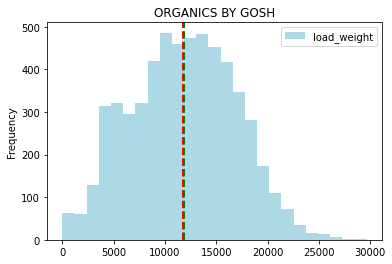

In [ ]:
organics_by_gosh.plot.hist(title='ORGANICS BY GOSH', color='lightblue', bins=25)  
plt.axvline(organics_by_gosh['load_weight'].mean(), color='red', linestyle='dashed', linewidth=2)
plt.axvline(organics_by_gosh['load_weight'].median(), color='green', linestyle='dashed', linewidth=2)
plt.show()

From this data, we see that the data is well distributed. We 

will see the skewed distribution by using the .skew() function.

In [ ]:
organics_by_gosh['load_weight'].skew()

0.04408867950621049

In the data above, we can see that the skew distribution is 0.04 where the data is normal. But we still want to see if there are data outliers or not, then we will look at it with a boxplot.

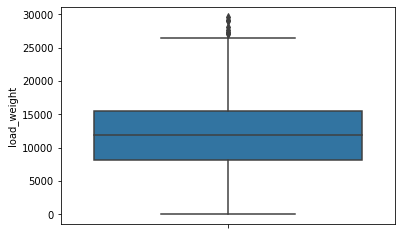

In [ ]:
sns.boxplot(data=organics_by_gosh, y = 'load_weight');

We can see that in the boxplot there is a black dot above which means that there is no data outliers, in other words, there is still extreme data outside of the distribution data of the total data. If there are still data outliers we must first eliminate it so that the analysis is good.

Previously we started by looking for the mean, median and mode on the data.

In [ ]:
organics_by_gosh_mean = organics_by_gosh['load_weight'].mean()
organics_by_gosh_mean

11789.731711555169

In [ ]:
organics_by_gosh_median = organics_by_gosh['load_weight'].median()
organics_by_gosh_median

11900.0

In [ ]:
organics_by_gosh_mode = organics_by_gosh['load_weight'].mode()
organics_by_gosh_mode

0    14580.0
dtype: float64

After that we will look for variants of this data for more data distribution between total data.

In [ ]:
organics_by_gosh['load_weight'].var()

25989104.34371961

After that we look for the standard deviation to see the dispersion of the data relative to the mean.

In [ ]:
organics_by_gosh_std = organics_by_gosh['load_weight'].std()
organics_by_gosh_std

5097.950994636924

Once we get the standard deviation, we create an upper bound and lower limit formula to find out the uppermost and lowermost outliers.

In [ ]:
outliers_plus = organics_by_gosh_mean + 3*organics_by_gosh_std
outliers_plus

27083.584695465943

In [ ]:
outliers_minus = organics_by_gosh_mean - 3*organics_by_gosh_std
outliers_minus

-3504.1212723556037

Once we get the upper limit and the lower limit, we look for outliers data based on that data.

In [ ]:
organics_by_gosh.loc[organics_by_gosh['load_weight'] > 27083.58]

,report_date,load_type,load_time,load_weight,dropoff_site
6903,2021-02-26,ORGANICS,2021-02-26 05:12:00.000000 UTC,27620.0,ORGANICS BY GOSH
7275,2021-03-01,ORGANICS,2021-03-01 05:36:00.000000 UTC,27300.0,ORGANICS BY GOSH
9814,2021-03-15,ORGANICS,2021-03-15 12:00:00.000000 UTC,27240.0,ORGANICS BY GOSH
21339,2021-06-02,ORGANICS,2021-06-02 05:39:00.000000 UTC,28120.0,ORGANICS BY GOSH
21504,2021-06-03,ORGANICS,2021-06-03 07:05:00.000000 UTC,29660.0,ORGANICS BY GOSH
21945,2021-06-07,ORGANICS,2021-06-07 12:00:00.000000 UTC,29000.0,ORGANICS BY GOSH
22937,2021-06-14,ORGANICS,2021-06-14 06:15:00.000000 UTC,29160.0,ORGANICS BY GOSH
23116,2021-06-15,ORGANICS,2021-06-15 02:07:00.000000 UTC,27120.0,ORGANICS BY GOSH


And it turns out that there are 8 data outliers in the top data search.

In [ ]:
organics_by_gosh.loc[organics_by_gosh['load_weight'] < -3504.12]

,report_date,load_type,load_time,load_weight,dropoff_site


For the lower bound no data outliers were found.

After that, we are looking for what percentage of data outliers on the data site ORGANICS BY GOSH.

In [ ]:
organics_by_gosh_outliers_percent = organics_by_gosh.loc[organics_by_gosh['load_weight'] > 27083.58].value_counts().sum()
organics_by_gosh_outliers_percent

8

In [ ]:
organics_by_gosh_o_total = organics_by_gosh_outliers_percent/organics_by_gosh_percent*100
print(organics_by_gosh_o_total, '%')

0.13900955690703737 %


And we can know, the outliers data on the ORGANICS BY GOSH data site is 13.9%. But still we have to take out the outliers data so that the data is not unequal far away.

We do a drop index that refers to the outliers data.

In [ ]:
organics_by_gosh.drop(index = [6903,7275,9814,21339,21504,21945,22937,23116], inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Then we check whether the outliers data has been lost.

In [ ]:
organics_by_gosh.count()

report_date     5747
load_type       5747
load_time       5747
load_weight     5747
dropoff_site    5747
dtype: int64

From the total data above, we can know that the data no longer exists. Then we continue back by creating a boxplot.

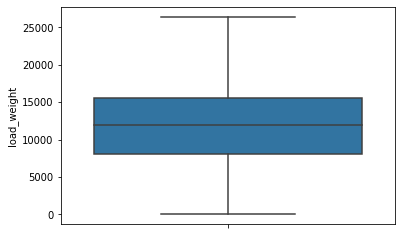

In [ ]:
sns.boxplot(data=organics_by_gosh, y = 'load_weight');

We can see that in the new boxplot there is no longer a black dot above as before, because the black dot has been removed.

From the boxplot, we want to see the data removed after the outliers are removed.

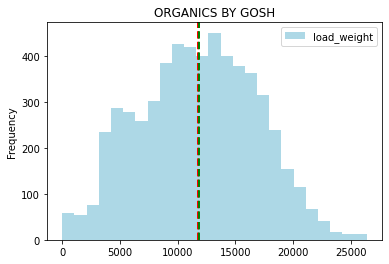

In [ ]:
organics_by_gosh.plot.hist(title='ORGANICS BY GOSH', color='lightblue', bins=25)  
plt.axvline(organics_by_gosh['load_weight'].mean(), color='red', linestyle='dashed', linewidth=2)
plt.axvline(organics_by_gosh['load_weight'].median(), color='green', linestyle='dashed', linewidth=2)
plt.show()

From the distribution data above, we can see that the distribution of data falls into the normal (Gaussian) category.

Then we want to see the distribution of data that is already clear with the .skew() function.

In [ ]:
organics_by_gosh['load_weight'].skew()

0.011097796711244147

Then we check again Central Tendecy (mean, median, mode).

In [ ]:
organics_by_gosh['load_weight'].mean()

11766.954236993213

In [ ]:
organics_by_gosh['load_weight'].median()

11880.0

In [ ]:
organics_by_gosh.apply(pd.Series.mode)

,report_date,load_type,load_time,load_weight,dropoff_site
0,2021-04-01,ORGANICS,2021-03-09 12:00:00.000000 UTC,14580.0,ORGANICS BY GOSH


We can see the new value after the outliers are issued.

#### New Site

The government plans to build a new site, then they ask us to analyze and provide a nest regarding the new site that wants to be built to have what capacity.

Previously we wanted to find out in advance whether the government needed a new site for ORGANICS type waste.

The first step is to find the confidence interval, the point of the confidence interval is the range between two values which is a sample of the average values located between them.



In [ ]:
daily_input = organics_by_gosh[["report_date","load_weight"]].groupby(organics_by_gosh["report_date"]).sum().sort_values("report_date")
confidence_interval = stats.norm.interval(0.90, daily_input.load_weight.mean(), daily_input.load_weight.std())
confidence_interval

(32424.10534724529, 875289.800693023)

After we have looked for confidence intervals on the ORGANICS BY GOSH site in a span of 6 months, if the government wants to build a new site for the ORGANICS library it is still in the safe category but at least the new site must have a capacity between 32424.10 - 875289.80 kg to get maximum efficiency results.

### HYPOTHESIS TESTING

Before we do the hypothesis test, we will take a new site that contributes also to the comparison. The site is ON ROUTE HIGH DUMP. Let's do the data cleaning first.

#### ON ROUTE HIGH DUMP

We'll create a new variable on this site to our dataframe.

In [ ]:
orhd = df.loc[df['dropoff_site']=='ON ROUTE HIGH DUMP']
orhd

,report_date,load_type,load_time,load_weight,dropoff_site
1856,2021-01-14,SWEEPING,2021-01-14 10:35:00.000000 UTC,0.0,ON ROUTE HIGH DUMP
1857,2021-01-14,SWEEPING,2021-01-14 09:40:00.000000 UTC,0.0,ON ROUTE HIGH DUMP
2019,2021-01-15,SWEEPING,2021-01-15 10:00:00.000000 UTC,0.0,ON ROUTE HIGH DUMP
2228,2021-01-18,SWEEPING,2021-01-18 10:30:00.000000 UTC,0.0,ON ROUTE HIGH DUMP
2229,2021-01-18,SWEEPING,2021-01-18 09:00:00.000000 UTC,0.0,ON ROUTE HIGH DUMP
...,...,...,...,...,...
24832,2021-06-28,SWEEPING,2021-06-28 10:10:00.000000 UTC,0.0,ON ROUTE HIGH DUMP
25004,2021-06-29,SWEEPING,2021-06-29 10:35:00.000000 UTC,0.0,ON ROUTE HIGH DUMP
25005,2021-06-29,SWEEPING,2021-06-29 09:45:00.000000 UTC,0.0,ON ROUTE HIGH DUMP
25359,2021-07-01,SWEEPING,2021-07-01 09:20:00.000000 UTC,0.0,ON ROUTE HIGH DUMP


Let's see what type of garbage is on the ON ROUTE HIGH DUMP site.

In [ ]:
orhd['load_type'].value_counts()

SWEEPING    74
ORGANICS     7
Name: load_type, dtype: int64

After we see, there is a type of ORGANICS waste, so we will choose ORGANICS waste for us to do further analysis. 

Then we check how much the total ORGANICS garbage data is on the ON ROUTE HIGH DUMP site.

In [ ]:
orhd_organics = orhd.loc[orhd['load_type']== 'ORGANICS']

In [ ]:
orhd_organics.value_counts().sum()

7

See there are 7 data on ON ROUTE HIGH DUMP. Then we look for Central Tendency (mean, median, mode) on this site.

In [ ]:
orhd_organics_mean = orhd_organics['load_weight'].mean()
orhd_organics_mean

12525.714285714286

In [ ]:
orhd_organics_median = orhd_organics['load_weight'].median()
orhd_organics_median

14940.0

In [ ]:
orhd_organics_mode = orhd_organics['load_weight'].mode()[0]
orhd_organics_mode

4060.0

Then we look at the variance and standard deviation.

In [ ]:
orhd_organics_var = orhd_organics['load_weight'].var()
orhd_organics_var

25274361.904761907

In [ ]:
orhd_organics_std = orhd_organics['load_weight'].std()
orhd_organics_std

5027.361326258727

Then we display it visually with the entire dataframe.

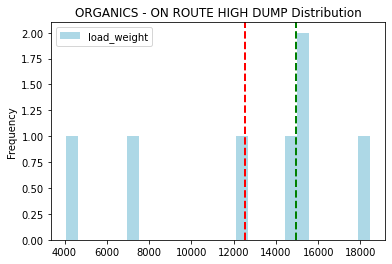

In [ ]:
orhd_organics.plot.hist(title='ORGANICS - ON ROUTE HIGH DUMP Distribution', color='lightblue', bins=25)  
plt.axvline(orhd_organics['load_weight'].mean(), color='red', linestyle='dashed', linewidth=2)
plt.axvline(orhd_organics['load_weight'].median(), color='green', linestyle='dashed', linewidth=2)
plt.show()

We can see, the distribution of data is abnormal (skew). We'll check through .skew().

In [ ]:
orhd_organics['load_weight'].skew()

-0.8761440212302224

And the result is negative, meaning that the data goes to the left skew. Then we enter the boxplot to see if there are data outliers or not.

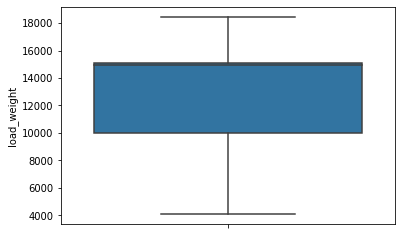

In [ ]:
sns.boxplot(data = orhd_organics, y = 'load_weight');

From the boxplot above, we don't see any data outliers, so we can continue to look for standard deviation, variance, and range at both sites.

In [ ]:
#standard deviation of ORGANICS BY GOSH ANOD ON ROUTE HIDH DUMP
organics_by_gosh_std = organics_by_gosh['load_weight'].std()
print(organics_by_gosh_std, '', orhd_organics_std)

5064.661721453956  5027.361326258727


In [ ]:
#variance of ORGANICS BY GOSH ANOD ON ROUTE HIDH DUMP
organics_by_gosh_var = organics_by_gosh['load_weight'].var()
print(organics_by_gosh_var, '', orhd_organics_var)

25650798.35276094  25274361.904761907


In [ ]:
#range of ORGANICS BY GOSH ANOD ON ROUTE HIDH DUMP
organics_by_gosh_range = organics_by_gosh['load_weight'].max() - organics_by_gosh['load_weight'].min()
orhd_organics_range = orhd_organics['load_weight'].max() - orhd_organics['load_weight'].min()
print(organics_by_gosh_range, '', orhd_organics_range)


26400.0  14400.0


Then we enter the hypothesis test.

We use 2 samples and 2 tails:

H0 : μ ORGANICS BY GOSH LOAD WEIGHT = μ ON ROUTE HIGH DUMP LOAD WEIGHT

H1 : μ ORGANICS BY GOSH LOAD WEIGHT != μ ON ROUTE HIGH DUMP LOAD WEIGHT

In this case, we will see if the site load_weight ORGANICS BY GOSH and site ON ROUTE HIDH DUMP are significantly different or not.

After that we do a t-test on both sites.

In [ ]:
# t-test
t_stat, p_val = stats.ttest_ind(organics_by_gosh['load_weight'], orhd_organics['load_weight'])
print('P-value:',p_val)
print('t-statistics:',t_stat)

P-value: 0.6920209330773515
t-statistics: -0.3961339152610035


After we get the P-Value, we will display a visual whether H1 reject H0 or H1 fails to reject H0.

1840.3996690648291
21693.5088049216


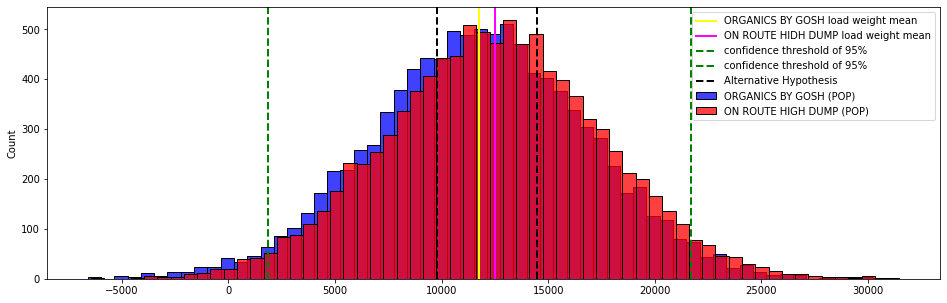

In [ ]:
# simulation
organics_by_gosh_pop = np.random.normal(organics_by_gosh['load_weight'].mean(),organics_by_gosh['load_weight'].std(),10000)
orhd_pop = np.random.normal(orhd_organics['load_weight'].mean(),orhd_organics['load_weight'].std(),10000)

# confidence interval based on ORGANICS BY GOSH
confidence_interval = stats.norm.interval(0.95, organics_by_gosh['load_weight'].mean(), organics_by_gosh['load_weight'].std())

plt.figure(figsize=(16,5))
sns.histplot(organics_by_gosh_pop, label='ORGANICS BY GOSH (POP)',color='blue')
sns.histplot(orhd_pop, label='ON ROUTE HIGH DUMP (POP)',color='red')

# mean
plt.axvline(organics_by_gosh['load_weight'].mean(), color='yellow', linewidth=2, label='ORGANICS BY GOSH load weight mean')
plt.axvline(orhd_organics['load_weight'].mean(), color='magenta',  linewidth=2, label='ON ROUTE HIDH DUMP load weight mean')

plt.axvline(confidence_interval[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(confidence_interval[0], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')

# alternative hypotesis
plt.axvline(organics_by_gosh_pop.mean()+t_stat*organics_by_gosh_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(orhd_pop.mean()-t_stat*organics_by_gosh_pop.std(), color='black', linestyle='dashed', linewidth=2)

plt.legend()
print(confidence_interval[0])
print(confidence_interval[1])

From the T-Test above, we can see that we failed to reject H0 with the meaning ORGANICS BY GOSH equal to ON ROUTE HIGH DUMP. We can see in the black line being inside of the confidence interval. So for recommendations for creating a new site, it is less applicable using analysis like this.

#### Questions

1. We use the z score technique. Because our data is normal distribution so we do z score. However, the ON ROUTE HIGH DUMP site is a left skew data, so we do tukey's test.
2. Confidence Interval is used to find accuracy in our data, for example we do on ORGANICS BY GOSH to find the average. The concept is that if our hypothesis lies in the confidence interval then the HO fails to be rejected, on the contrary if our hypothesis is outside of the confidence interval then the HO is rejected.
3. I applied the hypothesis test of 2 samples 2 tailed, because we will compare other sites in the sense that there is a significant difference or not, and test with the T-Test. What we take is the ORGANICS BY GOSH and ON ROUTE HIGH DUMP sites because both sites hold the largest ORGANICS waste load when we search for site data with the ORGANICS waste category.

#### Problem 2 (Math/Calculus)

First we'll group the report_date and load_weight on the dataframe.

In [ ]:
df1 = df.groupby('report_date')['load_weight'].sum().to_frame()
df1

,load_weight
report_date,
2021-01-01,0.0
2021-01-02,2170130.0
2021-01-04,2920260.0
2021-01-05,2388540.0
2021-01-06,2396550.0
...,...
2021-07-05,1897290.0
2021-07-06,1921640.0
2021-07-07,1553080.0


Then we will define the variable, from that variable we will calculate the data differential we then multiply it with the data range differential.

In [ ]:
v = np.diff(df1['load_weight'])/np.diff(range(166))

Then we calculate the estimated weight of tomorrow with the formula below:

In [ ]:
load_weight_tommorow = df1['load_weight'][-1] + v[-1]*1
abs(load_weight_tommorow)

1176970.0

With the above results, we can predict the load weight for July 10, 2021 with a weight of 1176970.0 kg

#### Questions

1. I use the numeric method in the numpy library by using the .diff() function
2. Yes, we need mathematical functions. With the given formula we can calculate by inputting the data value from us. That way we can calculate the differential in the data so that we can use it to predict the weight of tomorrow's waste load.
3. The estimated weight tomorrow (July 10, 2021) is 1176970.0 kg

## Conclusion

We can know that the waste distribution in the city of Austin is not well distributed, because we can see a lot of missing data with the meaning that the distribution to the site is uneven. Because it is uneven, there is a buildup of garbage at certain sites which can cause problems in the future. Therefore, we must equalize the distribution of waste so that waste can be managed properly and there are no problems in the future.